## Topic Modeling
+ 문서 집합에서 주제를 찾아내기 위한 방법
+ 특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이라는 가정에 기반
+ 잠재의미분석과 잠재 디리클레 할당 기법이 주로 사용됨

### 잠재의미분석(Latent Semantic Analysis)
+ 주로 문서 색인(index)의 의미 검색에 사용 => 잠재의미인덱싱(Latent Semantic Indexing)으로도 알려져 있음
+ 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
+ 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정
+ 문서 모음에서 생성한 문서-단어행렬(Document Term Matrix)에서 단어-토픽행렬(Term-Topic Matrix)과 토픽-중요도행렬(Topic-Importance Matrix),  
그리고 토픽-문서행렬(Topic-Document Matrix)로 분해함으로써 분석

### 잠재 디리클레 할당(Latent Dirichlet Allocation)
+ p(t|d) : 문서 d의 단어들 중 토픽 t에 해당하는 비율 => 해당 문서에 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음
+ p(w|t) : 단어 w를 포함하는 모든 문서들 중 토픽 t가 할당된 비율 => 다른 문서에서 단어 w에 많이 할당된 토픽이 w의 토픽이 될 가능성이 높음 
+ 사용자가 토픽의 개수를 지정해 알고리즘에 전달  
=> 모든 단어들을 토픽 중 하나에 할당  
=> 모든 문서의 모든 단어에 대해 p(t|d), p(w|t)에 의거해 토픽 재할당 반복  
즉, 자신만이 잘못된 토픽에 할당되어 있고, 다른 모든 단어는 올바른 토픽에 할당되었다고 가정

In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(shuffle=True, random_state=2,
                          remove=('headers', 'footers', 'quotes'))
docs = data.data

print(len(docs))
docs[0]

11314


"Something about how Koresh had threatened to cause local \nproblems with all these wepaons he had and was alleged to\nhave.  \n\nSomeone else will post more details soon, I'm sure.\n\nOther News:\nSniper injures 9 outside MCA buildling in L.A.  Man arrested--suspect\nwas disgruntled employee of Universal Studios, which\nis a division of M.C.A.\n\n\nQUESTION:\nWhat will Californians do with all those guns after the Reginald\ndenny trial?"

In [2]:
#전처리
import re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import preprocess_string
#nltk.download('stopwords')

def clean_text(d):     #알파벳과 공백문자가 아닌 텍스트 삭제
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

def clean_stopword(d):
    stop_words = stopwords.words('english')
    result = ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w)>3])
    return result

def preprocessing(d):
    return preprocess_string(d)

In [3]:
import pandas as pd

news_df = pd.DataFrame({'article':docs})
print(len(news_df))

news_df.replace('', float('NaN'), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))
print(news_df.head(2))

news_df['article'] = news_df['article'].apply(clean_text)
news_df['article'] = news_df['article'].apply(clean_stopword)
print(news_df.head(2))

11314
11096
                                             article
0  Something about how Koresh had threatened to c...
1  I have an Okidata 2410 printer for which I wou...
                                             article
0  something koresh threatened cause local proble...
1  okidata printer would like printer driver anyo...


In [4]:
tokenized_df = news_df['article'].apply(preprocessing)
tokenized_list = tokenized_df.to_list()

tokenized_list[0]

['koresh',
 'threaten',
 'caus',
 'local',
 'problem',
 'wepaon',
 'alleg',
 'post',
 'detail',
 'soon',
 'sure',
 'new',
 'sniper',
 'injur',
 'outsid',
 'buildl',
 'arrestedsuspect',
 'disgruntl',
 'employe',
 'univers',
 'studio',
 'divis',
 'question',
 'californian',
 'gun',
 'reginald',
 'denni',
 'trial']

In [5]:
import numpy as np

drop_news = [i for i, sentence in enumerate(tokenized_list) if len(sentence)<=1]
news_text = np.delete(tokenized_list, drop_news, axis=0)

print(len(news_text))

10926


c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [6]:
#gensim을 이용한 토픽모델링
from gensim import corpora

dictionary = corpora.Dictionary(news_text)
corpus = [dictionary.doc2bow(text) for text in news_text]

corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1)]

### 잠재의미분석을 위한 LsiModel

In [7]:
from gensim.models import LsiModel

lsi = LsiModel(corpus, num_topics=20, id2word=dictionary)
topics = lsi.print_topics()

topics

[(0,
  '-1.000*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.008*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv" + -0.005*"maxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.003*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxq" + -0.002*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxf" + -0.002*"mqaxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxasqq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxasq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqqf"'),
 (1,
  '0.393*"file" + 0.191*"program" + 0.158*"imag" + 0.126*"peopl" + 0.125*"avail" + 0.119*"inform" + 0.116*"includ" + 0.116*"entri" + 0.114*"work" + 0.112*"dont"'),
 (2,
  '-0.456*"file" + 0.215*"peopl" + 0.210*"know" + 0.192*"said" + 0.176*"dont" + -0.158*"entri" + 0.158*"think" + 0.153*"stephanopoulo" + -0.139*"imag" + 0.129*"go"'),
 (3,
  '-0.409*"file" + -0.286*"entri" + 0.241*"imag" + 0.168*"avail" + 0.141*"wire" + 0.136*"data" + 0.122*"version" + -0.116*"onam" + 0.109*"window" + -0.104*"said"'),
 (4,
  '0.618*"wire" + 0.250*"ground" + 0.188*"circ

[0.41868048032064503, 0.4091355799864383, 0.37320469211645085, 0.4330134146422892, 0.4104263245568862]


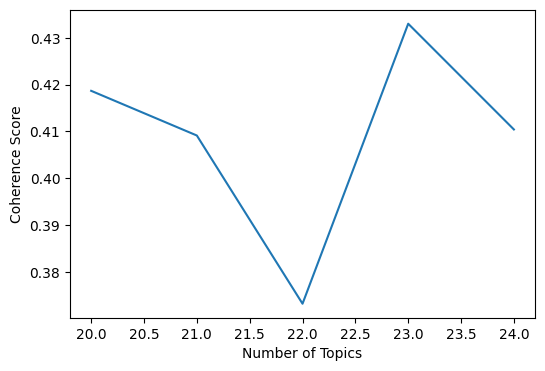

In [8]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

min_topics, max_topics = 20, 25
coherence_scores = []

for num_topics in range(min_topics, max_topics):
    model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence = CoherenceModel(model=model, texts=news_text, dictionary=dictionary)
    coherence_scores.append(coherence.get_coherence())
    
print(coherence_scores)

x = [int(i) for i in range(min_topics, max_topics)]
plt.figure(figsize=(6,4))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score');

토픽 개수가 23개일 때 Coherence 점수가 가장 높게 나왔다.

In [10]:
lsi = LsiModel(corpus, num_topics=23, id2word=dictionary)
topics = lsi.print_topics(num_topics=23)

topics

[(0,
  '1.000*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.008*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv" + 0.005*"maxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.003*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxq" + 0.002*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxf" + 0.002*"mqaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxasqq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxasq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqqf"'),
 (1,
  '0.393*"file" + 0.191*"program" + 0.158*"imag" + 0.126*"peopl" + 0.125*"avail" + 0.119*"inform" + 0.116*"includ" + 0.116*"entri" + 0.114*"work" + 0.112*"dont"'),
 (2,
  '0.456*"file" + -0.215*"peopl" + -0.210*"know" + -0.192*"said" + -0.176*"dont" + 0.158*"entri" + -0.158*"think" + -0.153*"stephanopoulo" + 0.139*"imag" + -0.129*"go"'),
 (3,
  '-0.409*"file" + -0.286*"entri" + 0.241*"imag" + 0.168*"avail" + 0.141*"wire" + 0.136*"data" + 0.122*"version" + -0.116*"onam" + 0.109*"window" + -0.104*"said"'),
 (4,
  '-0.618*"wire" + -0.250*"ground" + -0.188*"circuit

### 잠재 디리클레 할당을 위한 LdaModel

In [11]:
from gensim.models import LdaModel

lda = LdaModel(corpus, num_topics=20, id2word=dictionary)
topics = lda.print_topics()

topics

[(0,
  '0.018*"diseas" + 0.012*"patient" + 0.008*"research" + 0.008*"medic" + 0.007*"candida" + 0.007*"treatment" + 0.006*"center" + 0.005*"present" + 0.005*"april" + 0.005*"infect"'),
 (1,
  '0.007*"softwar" + 0.006*"paradox" + 0.005*"copi" + 0.005*"scope" + 0.004*"lankford" + 0.004*"intergraph" + 0.003*"torr" + 0.003*"gilkei" + 0.003*"deterr" + 0.003*"radiu"'),
 (2,
  '0.019*"encrypt" + 0.015*"chip" + 0.012*"secur" + 0.012*"clipper" + 0.011*"privaci" + 0.009*"messag" + 0.007*"administr" + 0.006*"presid" + 0.006*"algorithm" + 0.006*"technolog"'),
 (3,
  '0.012*"launch" + 0.006*"space" + 0.006*"year" + 0.006*"program" + 0.006*"entri" + 0.005*"probe" + 0.005*"mission" + 0.005*"orbit" + 0.004*"homosexu" + 0.004*"observ"'),
 (4,
  '0.009*"card" + 0.006*"problem" + 0.005*"like" + 0.005*"need" + 0.005*"adaptec" + 0.004*"price" + 0.004*"upgrad" + 0.004*"cost" + 0.004*"year" + 0.004*"driver"'),
 (5,
  '0.014*"imag" + 0.009*"iran" + 0.009*"version" + 0.007*"sunview" + 0.007*"itll" + 0.004*"xpu

[0.5147149483303289, 0.49751737749272124, 0.513720764782566, 0.49006342058354213, 0.49010134003078126]


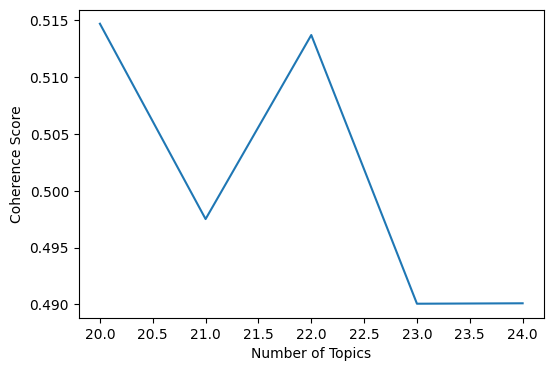

In [14]:
min_topics, max_topics = 20, 25
coherence_scores = []

for num_topics in range(min_topics, max_topics):
    model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence = CoherenceModel(model=model, texts=news_text, dictionary=dictionary)
    coherence_scores.append(coherence.get_coherence())
    
print(coherence_scores)

x = [int(i) for i in range(min_topics, max_topics)]
plt.figure(figsize=(6,4))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score');

토픽 개수가 20개일 때 Coherence 점수가 가장 높게 나왔다.

In [18]:
#토픽 모델링 시각화
#!pip install pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)